In [1]:
import pandas as pd
import numpy as np
import os
import json
import cv2
import matplotlib.pyplot as plt


In [2]:
with open('malaria//test.json') as file:
  test_data = json.load(file)

with open('malaria//training.json') as file:
  training_data = json.load(file)

In [3]:
def display_bounding_boxes(data,img_list=[0,1],radom_number=10,rnd=False):
    
    
    '''Funkcja nakłada na zdjęcia bounding boxy, które są zdefiniowane w plikach training.json lub test.json.
        Funkcję można wywołać na trzy sposoby:
        1. Można podać tylko jeden argument czyli źródło danych test lub trening: display_bounding_boxes(training_data) - domślnie zostaną wyświetlone zdjęcia nr 0 oraz 1
        2. Jako arguemnt można podać listę zdjęć np. display_bounding_boxes(training_data,[0,1,2,3,5,6])
        3. Można również wylosować podaną liczbę zdjęć, MAKSYMALNIE 20!. Trzeba zmienić argument rnd=True oraz podać liczbę zdjęć-radom_number.
            Przykład: display_bounding_boxes(training_data,rnd=True,radom_number=10) - wylosuje 10 zdjęć
        '''

    if rnd == True:
        img_list = np.random.randint(0,len(data)-1, size=radom_number)
    else:
        img_list=img_list

    for img_nb in img_list:
        img = cv2.imread(data[img_nb]['image']['pathname'].replace('/', '', 1))
        fig = plt.figure(figsize=(5,2.5))
        idx=0
        for i in data[img_nb]['objects']:
            x,y = data[img_nb]['objects'][idx]['bounding_box']['minimum']['c'],data[img_nb]['objects'][idx]['bounding_box']['minimum']['r']
            w = data[img_nb]['objects'][idx]['bounding_box']['maximum']['c']-data[img_nb]['objects'][idx]['bounding_box']['minimum']['c']
            h = data[img_nb]['objects'][idx]['bounding_box']['maximum']['r']-data[img_nb]['objects'][idx]['bounding_box']['minimum']['r']
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,57,0),3)
            idx+=1
        plt.imshow(img)
        plt.title(img_nb)
        img_nb+=1
        

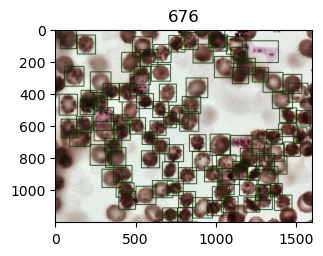

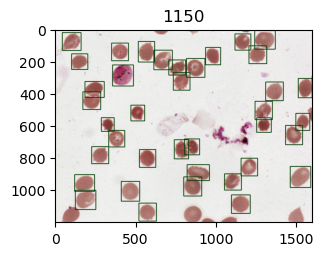

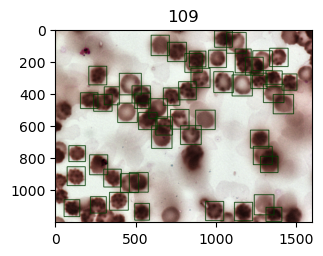

In [4]:
display_bounding_boxes(training_data,rnd=True,radom_number=3)

How to get into the JSON?

#### Level 1 - list

In [6]:
test_data[0]

{'image': {'checksum': 'eea3bfd6a929bcb06f9786667cd3fbb2',
  'pathname': '/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg',
  'shape': {'r': 1383, 'c': 1944, 'channels': 3}},
 'objects': [{'bounding_box': {'minimum': {'r': 576, 'c': 1744},
    'maximum': {'r': 708, 'c': 1883}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 863, 'c': 1249},
    'maximum': {'r': 977, 'c': 1373}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 210, 'c': 1573},
    'maximum': {'r': 335, 'c': 1711}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 1017, 'c': 1124},
    'maximum': {'r': 1142, 'c': 1253}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 572, 'c': 1655},
    'maximum': {'r': 695, 'c': 1763}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 477, 'c': 1307},
    'maximum': {'r': 590, 'c': 1429}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 962, 'c': 59

####  Level 2 - image

In [9]:
test_data[0]['image']

{'checksum': 'eea3bfd6a929bcb06f9786667cd3fbb2',
 'pathname': '/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg',
 'shape': {'r': 1383, 'c': 1944, 'channels': 3}}

####  Level 2 - objects

In [10]:
test_data[0]['objects']

[{'bounding_box': {'minimum': {'r': 576, 'c': 1744},
   'maximum': {'r': 708, 'c': 1883}},
  'category': 'red blood cell'},
 {'bounding_box': {'minimum': {'r': 863, 'c': 1249},
   'maximum': {'r': 977, 'c': 1373}},
  'category': 'red blood cell'},
 {'bounding_box': {'minimum': {'r': 210, 'c': 1573},
   'maximum': {'r': 335, 'c': 1711}},
  'category': 'red blood cell'},
 {'bounding_box': {'minimum': {'r': 1017, 'c': 1124},
   'maximum': {'r': 1142, 'c': 1253}},
  'category': 'red blood cell'},
 {'bounding_box': {'minimum': {'r': 572, 'c': 1655},
   'maximum': {'r': 695, 'c': 1763}},
  'category': 'red blood cell'},
 {'bounding_box': {'minimum': {'r': 477, 'c': 1307},
   'maximum': {'r': 590, 'c': 1429}},
  'category': 'red blood cell'},
 {'bounding_box': {'minimum': {'r': 962, 'c': 595},
   'maximum': {'r': 1089, 'c': 738}},
  'category': 'red blood cell'},
 {'bounding_box': {'minimum': {'r': 417, 'c': 1699},
   'maximum': {'r': 551, 'c': 1838}},
  'category': 'red blood cell'},
 {'boun

#####  Level 2.1 - objects - list of bounding boxes

In [20]:
test_data[0]['objects'][0]

{'bounding_box': {'minimum': {'r': 576, 'c': 1744},
  'maximum': {'r': 708, 'c': 1883}},
 'category': 'red blood cell'}